### Handling Missing Data

Before handling missing values, we need first to determine the type of missing data to propose effective methods to handle them, we first need to explore the dataset to identify and understand the nature of the missing values. Here are the steps:

#### 1. Identify Missing Values

- **Check which features have missing values and their proportion:**
  - Identify the columns with missing values.
  - Calculate the proportion of missing values for each column.

#### 2. Analyze Patterns of Missing Data

- **Investigate if the missing data is related to other observed data in the dataset:**
  - Visualization techniques like heatmaps to check for patterns in missing data.
  - Analyze correlations between missing values and other features.

#### 3. Determine the Type of Missing Data

- **MCAR (Missing Completely At Random):** Missing values are independent of both observed and unobserved data.
- **MAR (Missing At Random):** Missing values are related to some of the observed data but not the missing data itself.
- **MNAR (Missing Not At Random):** Missing values depend on unobserved data.

#### 4. Propose Methods to Handle Missing Data

Different strategies can be applied based on the type of missing data:

- **For MCAR:**
  - If the proportion of missing data is small, we can remove the rows with missing values.
  - imputation techniques like mean, median, or mode imputation.

- **For MAR:**
  - Use statistical imputation methods like multiple imputation.
  - Machine learning algorithms to predict and fill in missing values based on other features.

- **For MNAR:**
  - Investigate the reasons behind the missing data.
  - Use model-based methods or sensitivity analysis to handle MNAR data.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
train_data = pd.read_csv('../dataset/train.csv')

# Check for missing values
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100

# Display features with missing values and their percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
fc,5,0.25
four_g,5,0.25
int_memory,5,0.25
m_dep,5,0.25
mobile_wt,4,0.20
n_cores,4,0.20
pc,5,0.25
px_height,4,0.20
px_width,2,0.10
ram,2,0.10


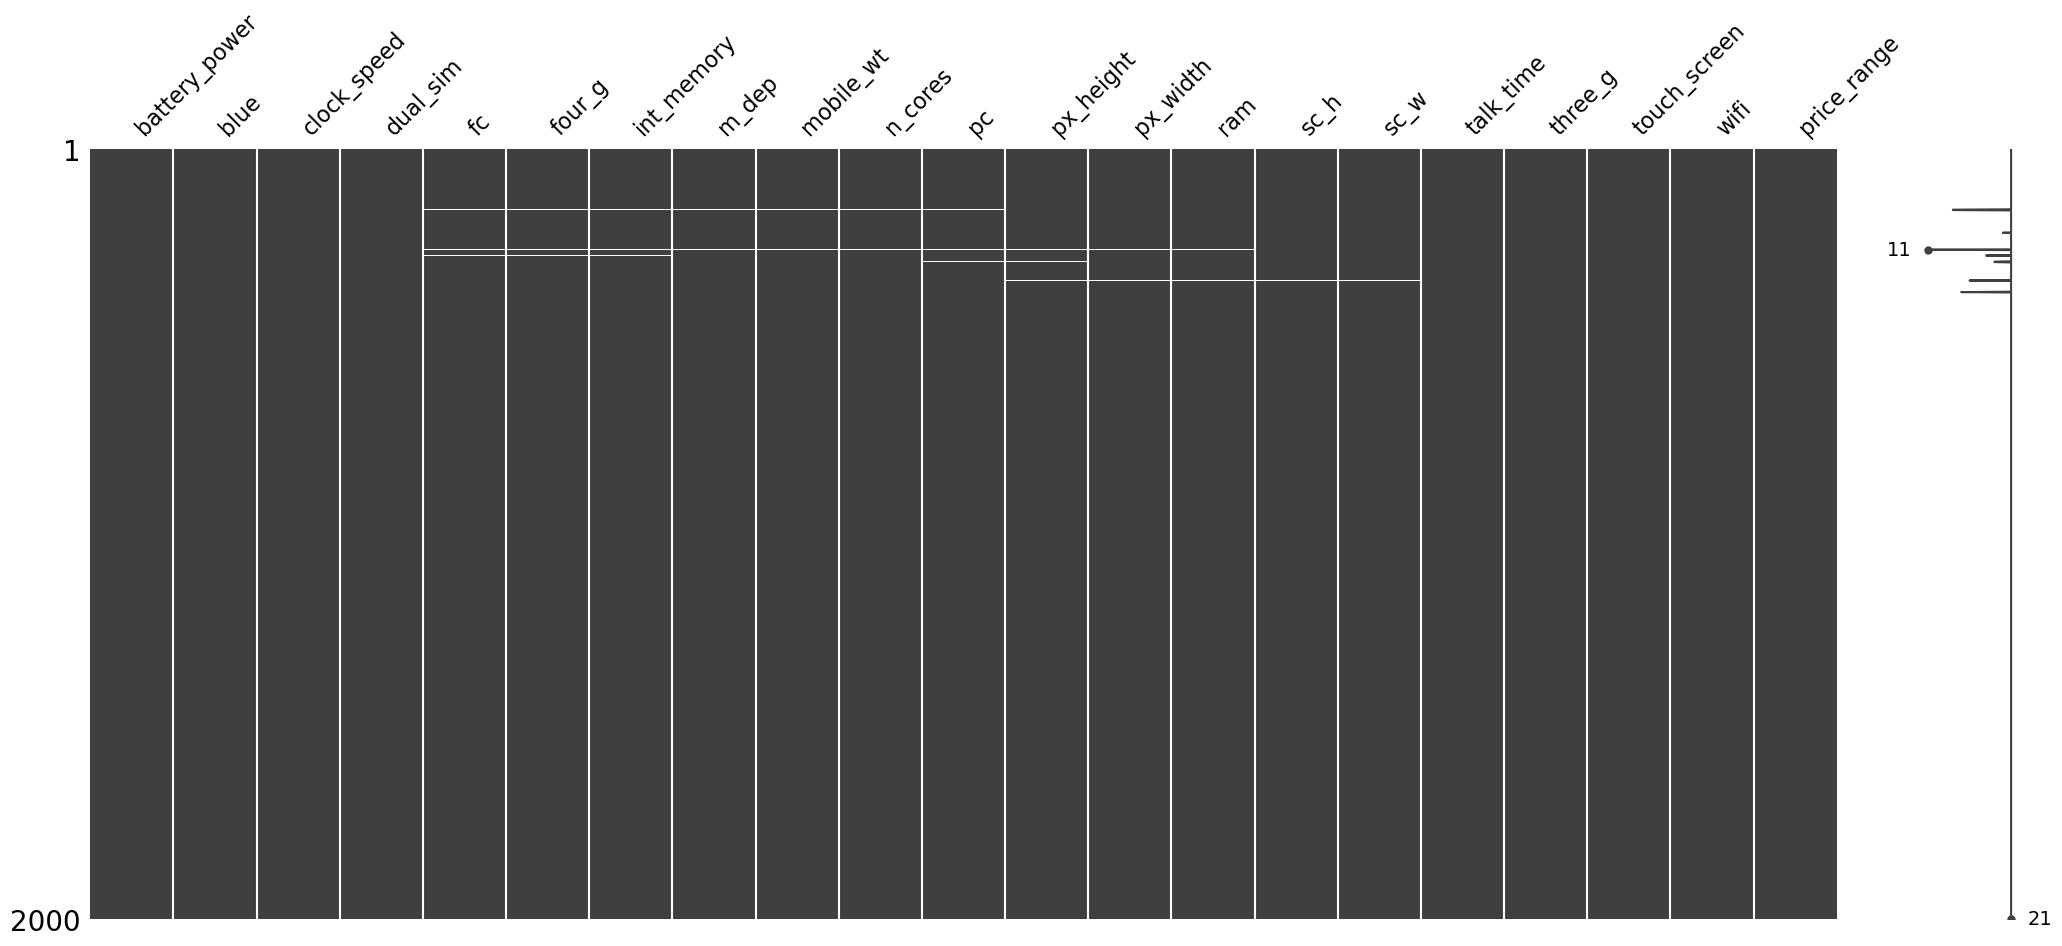

In [2]:
# Import additional library for missing data analysis
!pip install missingno

import missingno as msno
import matplotlib.pyplot as plt

# Visualize the missing data pattern
msno.matrix(train_data)
plt.show()


In [3]:
# Create a binary indicator for missing values in each column
missing_indicators = train_data.isnull().astype(int)

# Join the indicators with the original data
missing_data_analysis = train_data.join(missing_indicators, rsuffix='_missing')

# Check the correlation of missing indicators with the actual data
missing_corr = missing_data_analysis.corr()

# Extract only the correlations related to the missing indicators
missing_corr = missing_corr.filter(like='_missing').drop(index=train_data.columns, errors='ignore')
print(missing_corr)

                       battery_power_missing  blue_missing  \
battery_power_missing                    NaN           NaN   
blue_missing                             NaN           NaN   
clock_speed_missing                      NaN           NaN   
dual_sim_missing                         NaN           NaN   
fc_missing                               NaN           NaN   
four_g_missing                           NaN           NaN   
int_memory_missing                       NaN           NaN   
m_dep_missing                            NaN           NaN   
mobile_wt_missing                        NaN           NaN   
n_cores_missing                          NaN           NaN   
pc_missing                               NaN           NaN   
px_height_missing                        NaN           NaN   
px_width_missing                         NaN           NaN   
ram_missing                              NaN           NaN   
sc_h_missing                             NaN           NaN   
sc_w_mis

c:\Users\Public\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


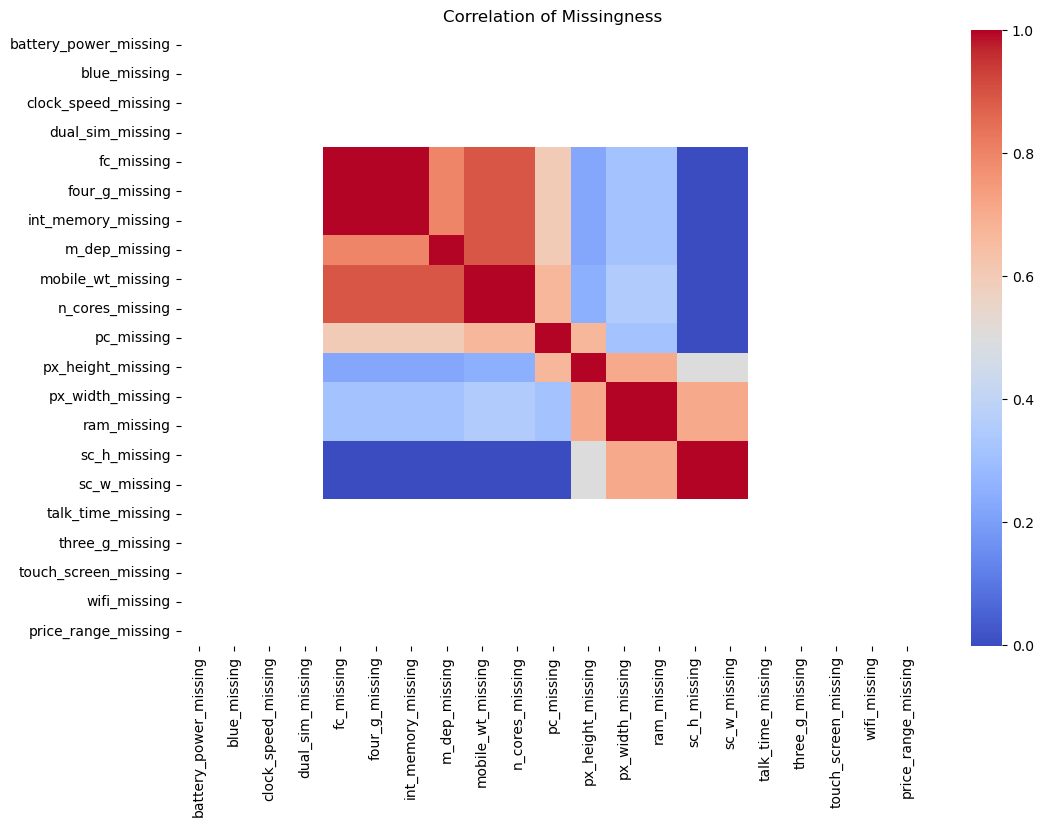

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Missingness')
plt.show()

Based on the analysis the missing data visualization and the correlation matrix show no significant pattern or correlation with other features, suggests that the data is Missing Completely at Random (MCAR), Since the missing data is random, you can impute missing values with mean, median, or mode without introducing bias.

In [5]:
# Impute missing numerical data with mean
for column in train_data.select_dtypes(include=['float64', 'int64']).columns:
    if train_data[column].isnull().sum() > 0:
        train_data[column].fillna(train_data[column].mean(), inplace=True)

# Impute missing categorical data with mode
for column in train_data.select_dtypes(include=['object']).columns:
    if train_data[column].isnull().sum() > 0:
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)

In [6]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100

missing_values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Feature Engineering

### Proposed Feature Engineering

#### Feature Interaction

- **Screen Area:**
  Multiply the screen height (`sc_h`) by the screen width (`sc_w`) to obtain the screen area.
  
- **Pixel Density:**
  Calculate pixel density by dividing the product of pixel height (`px_height`) and pixel width (`px_width`) by the screen area.
  
- **Camera Megapixels Ratio:**
  Divide the front camera megapixels (`fc`) by the primary camera megapixels (`pc`).

#### Categorical to Numerical Transformation

- **Connectivity Features:**
  Convert binary categorical features like `blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, and `wifi` into numerical features.

#### Log Transformation

- **Log RAM:**
  Apply natural logarithm to RAM values to reduce skewness.
  
- **Log Battery Power:**
  Apply natural logarithm to battery power values to reduce skewness.
  
- **Log Internal Memory:**
  Apply natural logarithm to internal memory values to reduce skewness.

#### Binning

- **Battery Power Binning:**
  Divide the battery power values into bins using quantiles.
  
- **RAM Binning:**
  Divide the RAM values into bins using quantiles.
  
- **Internal Memory Binning:**
  Divide the internal memory values into bins using quantiles.

#### Normalization and Standardization

- **Standardized Features:**
  Use techniques like StandardScaler or MinMaxScaler from sklearn to standardize features.


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Feature Interaction
train_data['screen_area'] = train_data['sc_h'] * train_data['sc_w']
# train_data['pixel_density'] = (train_data['px_height'] * train_data['px_width']) / train_data['screen_area']
# train_data['camera_mp_ratio'] = train_data['fc'] / train_data['pc']

# Log Transformation
train_data['log_ram'] = np.log1p(train_data['ram'])
train_data['log_battery_power'] = np.log1p(train_data['battery_power'])
train_data['log_int_memory'] = np.log1p(train_data['int_memory'])

# Binning
train_data['battery_power_bins'] = pd.qcut(train_data['battery_power'], q=4, labels=False)
train_data['ram_bins'] = pd.qcut(train_data['ram'], q=4, labels=False)
train_data['int_memory_bins'] = pd.qcut(train_data['int_memory'], q=4, labels=False)

# Normalize or Standardize features
scaler = StandardScaler()
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 
                      'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

# Verify the new features
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,touch_screen,wifi,price_range,screen_area,log_ram,log_battery_power,log_int_memory,battery_power_bins,ram_bins,int_memory_bins
0,-0.902597,0,0.830779,0,-0.764629,0.0,-1.382405,0.339276,1.350676,-1.101463,...,0,1,1,63.0,7.843849,6.736967,2.079442,0,2,0
1,-0.495139,1,-1.253064,1,-0.995615,1.0,1.156334,0.686381,-0.120727,-0.664034,...,1,0,2,51.0,7.875499,6.929517,3.988984,1,2,3
2,-1.537686,1,-1.253064,1,-0.533642,1.0,0.494054,1.380591,0.133939,0.210825,...,1,0,2,22.0,7.864804,6.335054,3.737670,0,2,2
3,-1.419319,1,1.198517,0,-0.995615,0.0,-1.216835,1.033486,-0.262208,0.648255,...,0,0,2,128.0,7.926603,6.423247,2.397895,0,2,0
4,1.325906,1,-0.395011,0,2.007209,1.0,0.659624,0.339276,0.020754,-1.101463,...,1,0,1,16.0,7.252762,7.507690,3.806662,3,1,2


In [9]:
train_data.isna().sum()



battery_power         0
blue                  0
clock_speed           0
dual_sim              0
fc                    0
four_g                0
int_memory            0
m_dep                 0
mobile_wt             0
n_cores               0
pc                    0
px_height             0
px_width              0
ram                   0
sc_h                  0
sc_w                  0
talk_time             0
three_g               0
touch_screen          0
wifi                  0
price_range           0
screen_area           0
log_ram               0
log_battery_power     0
log_int_memory        0
battery_power_bins    0
ram_bins              0
int_memory_bins       0
dtype: int64

In [10]:
train_data.to_csv("../dataset/cleaned_train.csv", index=False)